In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Biến mục tiêu

In [4]:
arsenal_df = pd.read_csv("../../feature_engineering_data/train/arsenal.csv")

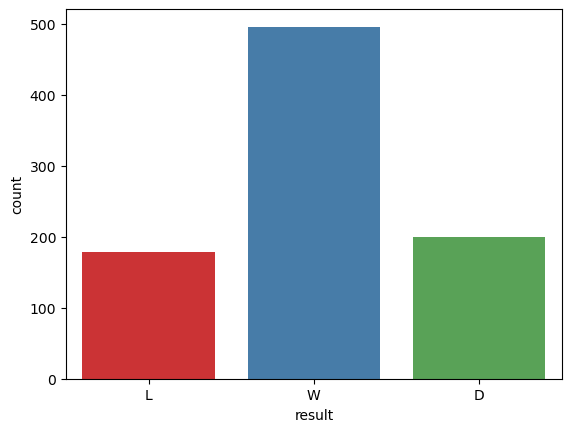

In [8]:
sns.countplot(x="result", data=arsenal_df, palette="Set1", hue="result");

#### Feature is_opponent_big6

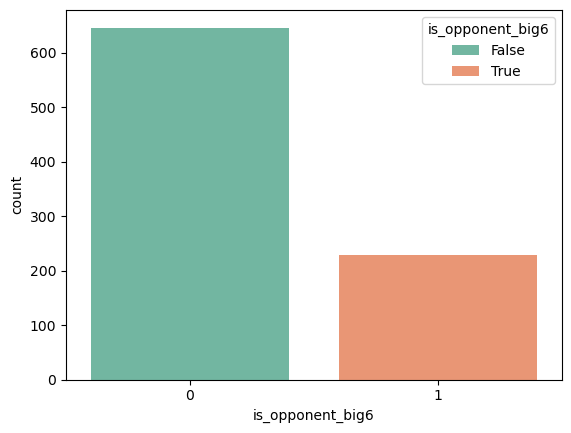

In [14]:
sns.countplot(data=arsenal_df, x="is_opponent_big6", palette="Set2", hue="is_opponent_big6");
plt.legend(title="is_opponent_big6", loc="upper right", labels=["False", "True"]);